In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as inte
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from numpy import matmul as mm

In [2]:
def sind(theta):
    return np.sin(theta/180*np.pi)
def cosd(theta):
    return np.cos(theta/180*np.pi)

In [3]:
def obs():
    obstacle = {}
    obstacle['vertices'] = np.array([[3,3],[3,4],
                                    [4,3],[-6,6],
                                    [-6,8],[-7,6],
                                    [-8,-6],[8,-6],
                                    [-8,-10],[8,-10]])
    obstacle['faces'] = np.array([[1,2,3],[4,5,6],
                                 [7,8,9],[8,9,10]])
    return obstacle

In [4]:
def appendFV(fv1,fv2):
    n1 = fv1['vertices'].shape[0]
    fv3 = {}
    fv3['vertices'] = np.vstack((fv1['vertices'],fv2['vertices']))
    fv3['faces'] = np.vstack((fv1['faces'],fv2['faces']+n1))
    return fv3
def transformFV(fv,theta,t):
    out = {}
    out['faces'] = fv['faces']
    c = cosd(theta)
    s = sind(theta)
    out['vertices'] = mm(fv['vertices'],np.array([[c,s],[-s,c]]))+t.reshape(1,-1)
    return out
def TwoLinkRobot(cspace_coordinates):
    w,l,w2,l2 = .5,5,.75,1
    link1,endeffector = {},{}
    link1['vertices']=np.array([[0,-w],[l,-w],[l,w],[0,w]])
    link1['faces']=np.array([[1,2,3],[1,3,4]])
    endeffector['vertices'] = np.array([[0,-w2],[l2,-w2],
                                       [0,w2],[l2,w2]])
    endeffector['faces'] = np.array([[1,2,3],[1,3,4]])
    link2 = appendFV(link1,transformFV(endeffector,0,np.array([l,0])))
    link2 = transformFV(link2,cspace_coordinates[0],np.array([l,0]))
    fv = appendFV(link1,link2)
    fv = transformFV(fv,cspace_coordinates[1],np.array([0,0]))
    return fv

In [5]:
def plotLinkRobot(angs):
    ax = plt.gca()
    fv,obstacle,sz = TwoLinkRobot(angs),obs(),12
    patches = []
    tmp = fv['vertices'][fv['faces'].flatten()-1]
    for i in range(3):
        polygon = Polygon(tmp[6*i:6*(i+1)], True)
        patches.append(polygon)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
    ax.add_collection(p)

    patches = []
    for i in range(3):
        if i == 2:
            polygon = Polygon(obstacle['vertices'][-4:][np.array([0,1,3,2])], True)
        else:
            polygon = Polygon(obstacle['vertices'][3*i:3*(i+1)], True)
        patches.append(polygon)
    p = PatchCollection(patches, cmap=matplotlib.cm.jet)
    ax.add_collection(p)

    ax.set_xlim([-12, 12])
    ax.set_ylim([12, 12])
    plt.axis('equal')
    return fv,obstacle

C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempting to set identical bottom == top == 12 results in singular transformations; automatically expanding.


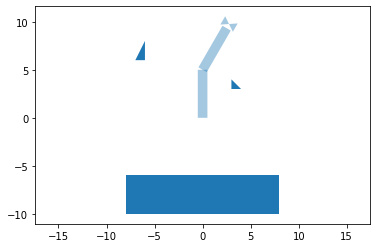

In [6]:
fv,obstacle = plotLinkRobot(np.array([330,90]))

In [7]:
theta1_range,theta2_range = np.arange(0,362,2),np.arange(0,362,2)
nrows,ncols = len(theta2_range),len(theta1_range)

In [8]:
def triangle_intersection(P1,P2):
    while True:
        flag,p1,p2 = True,P1.T,P2.T
        a1,b1,c1 = p1[:,0],p1[:,1],p1[:,2]
        a2,b2,c2 = p2[:,0],p2[:,1],p2[:,2]
        
        # 1st triangle
        v = a1-b1; v = np.array([[-v[1]],[v[0]]])
        s = np.sign(mm(v.T,a1-c1))
        s1 = np.sign(mm(v.T,a1-a2))
        s2 = np.sign(mm(v.T,a1-b2))
        s3 = np.sign(mm(v.T,a1-c2))
        if (s1!=s) and (s2!=s) and (s3!=s):
            flag = False; break
            
        v = b1-c1; v = np.array([[-v[1]],[v[0]]])
        s = np.sign(mm(v.T,b1-a1))
        s1 = np.sign(mm(v.T,b1-a2))
        s2 = np.sign(mm(v.T,b1-b2))
        s3 = np.sign(mm(v.T,b1-c2))
        if (s1!=s) and (s2!=s) and (s3!=s):
            flag = False; break
            
        v = c1-a1; v = np.array([[-v[1]],[v[0]]])
        s = np.sign(mm(v.T,c1-b1))
        s1 = np.sign(mm(v.T,c1-a2))
        s2 = np.sign(mm(v.T,c1-b2))
        s3 = np.sign(mm(v.T,c1-c2))
        if (s1!=s) and (s2!=s) and (s3!=s):
            flag = False; break
            
        # 2nd triangle
        v = a2-b2; v = np.array([[-v[1]],[v[0]]])
        s = np.sign(mm(v.T,a2-c2))
        s1 = np.sign(mm(v.T,a2-a1))
        s2 = np.sign(mm(v.T,a2-b1))
        s3 = np.sign(mm(v.T,a2-c1))
        if (s1!=s) and (s2!=s) and (s3!=s):
            flag = False; break
            
        v = b2-c2; v = np.array([[-v[1]],[v[0]]])
        s = np.sign(mm(v.T,b2-a2))
        s1 = np.sign(mm(v.T,b2-a1))
        s2 = np.sign(mm(v.T,b2-b1))
        s3 = np.sign(mm(v.T,b2-c1))
        if (s1!=s) and (s2!=s) and (s3!=s):
            flag = False; break
            
        v = c2-a2; v = np.array([[-v[1]],[v[0]]])
        s = np.sign(mm(v.T,c2-b2))
        s1 = np.sign(mm(v.T,c2-a1))
        s2 = np.sign(mm(v.T,c2-b1))
        s3 = np.sign(mm(v.T,c2-c1))
        if (s1!=s) and (s2!=s) and (s3!=s):
            flag = False; break
        break
    return flag

In [9]:
def CollisionCheck(fv1,fv2):
    n1,n2 = fv1['faces'].shape[0],fv2['faces'].shape[0]
    for i in range(n1):
        P1 = fv1['vertices'][fv1['faces'][i,:]-1,:]
        for j in range(n2):
            P2 = fv2['vertices'][fv2['faces'][j,:]-1,:]
            if triangle_intersection(P1,P2):
                out = True
                return out
    out = False
    return out

In [10]:
cspace = True*np.ones((nrows,ncols))
for i in range(nrows):
    for j in range(ncols):
        fv = TwoLinkRobot(np.array([theta1_range[j],theta2_range[i ]]))
        cspace[i,j] = CollisionCheck(fv,obstacle)
print('Done')

Done


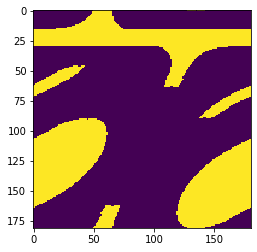

In [11]:
plt.imshow(cspace)

C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempting to set identical bottom == top == 12 results in singular transformations; automatically expanding.


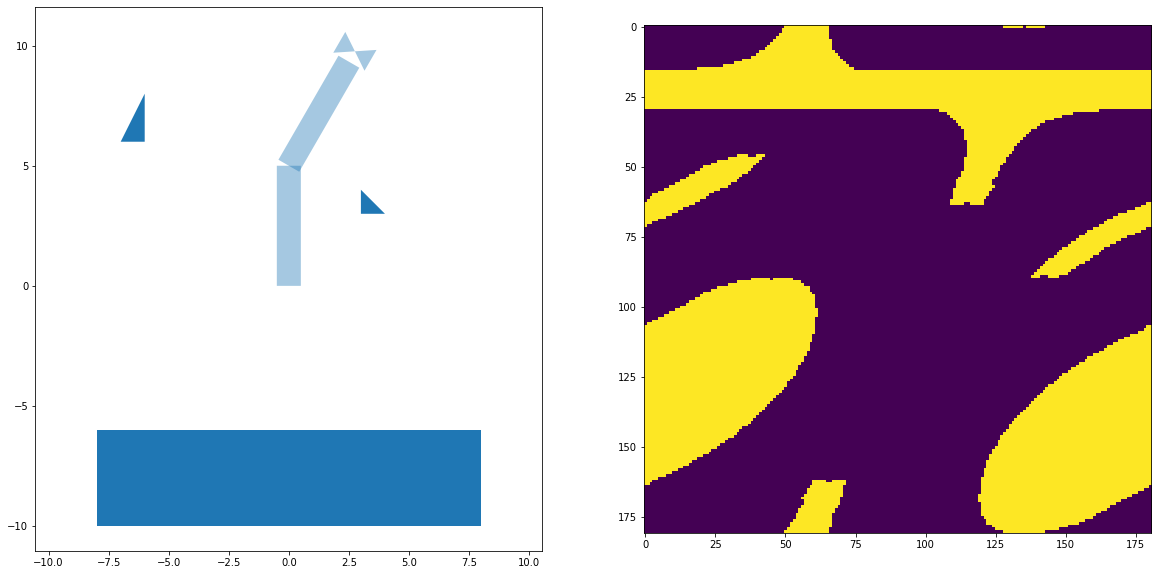

In [12]:
plt.figure(figsize=(20,10))
ax = plt.subplot(1,2,1)
plotLinkRobot(np.array([330,90]))

plt.subplot(1,2,2)
plt.imshow(cspace)

In [13]:
def DijkstraTorus(configmap,start,dest):
    # Initialization
    nrows,ncols = configmap.shape
    statemap = np.zeros((nrows,ncols))
    statemap[configmap==0],statemap[configmap==1] = 1,2
    statemap[tuple(start)],statemap[tuple(dest)] = 5,6
    distanceArray = np.ones((nrows,ncols))*np.inf
    distanceArray[start[0],start[1]]=0
    parentArray = np.zeros((nrows,ncols))

    loc = np.array([[start[0],dest[0]],[start[1],dest[1]]])
    st_node = np.ravel_multi_index(loc,(nrows,ncols))

    while True:
        statemap[tuple(start)],statemap[tuple(dest)] = 5,6

        min_dist = np.amin(distanceArray.flatten())
        current = np.argmin(distanceArray.flatten())

        if (current==st_node[-1]) or np.isinf(min_dist):
            break

        current_ind = np.unravel_index(current,(nrows,ncols))
        statemap[current_ind] = 3
        distanceArray[current_ind] = np.inf
        
        i = current_ind[0]; j = current_ind[1]
        for n in range(j-1,j+2,2):
            nn = n
            if n>=ncols:
                nn = 0
            elif n<0:
                nn = ncols-1
            if np.prod(statemap[i,nn]!=np.array([2,3,5])) and distanceArray[i,nn]>min_dist+1:
                distanceArray[i,nn] =  min_dist+1
                statemap[i,nn] = 4
                parentArray[i,nn] = current
                
        for k in range(i-1,i+2,2):
            kk = k
            if k>=nrows:
                kk = 0
            elif k<0:
                kk = nrows-1
            if np.prod(statemap[kk,j]!=np.array([2,3,5])) and distanceArray[kk,j]>min_dist+1:
                distanceArray[kk,j] =  min_dist+1
                statemap[kk,j] = 4
                parentArray[kk,j] = current
            
    route = []
    route.append(tuple(dest))
    while parentArray[route[-1]]!=0 :
        traceIdx = np.unravel_index(int(parentArray[route[-1]]),(nrows,ncols))
        route.append(traceIdx)

    return statemap,route,parentArray,distanceArray

In [14]:
start = np.array([40,80])
dest = np.array([100,110])
statemap,route,parentArray,distanceArray = DijkstraTorus(cspace,start,dest)

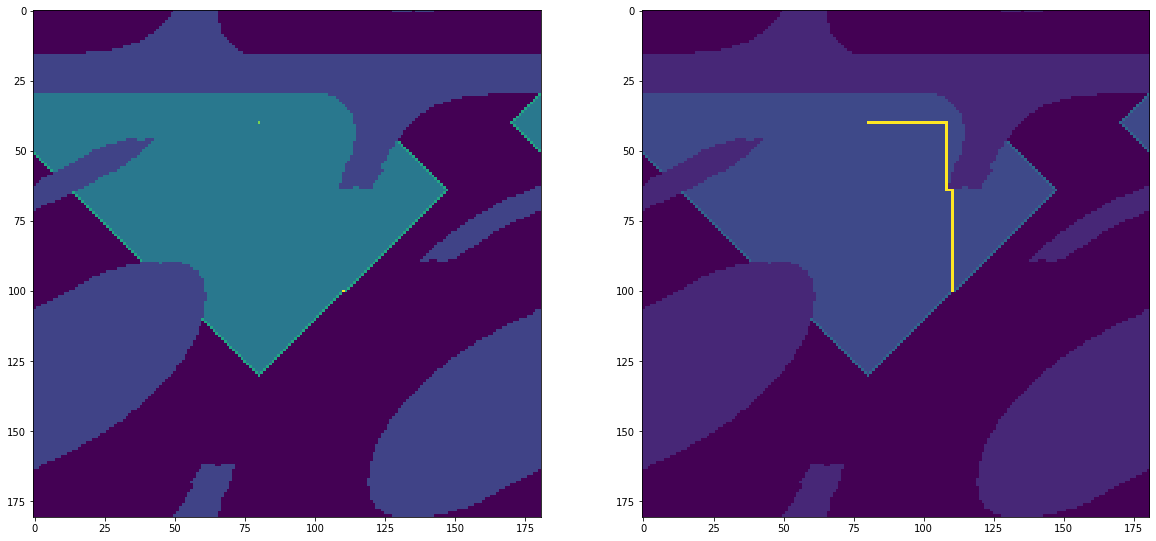

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(statemap)
plt.subplot(1,2,2)
smap = statemap
for i in range(len(route)):
    smap[route[i]] = 10
plt.imshow(smap)

C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempting to set identical bottom == top == 12 results in singular transformations; automatically expanding.


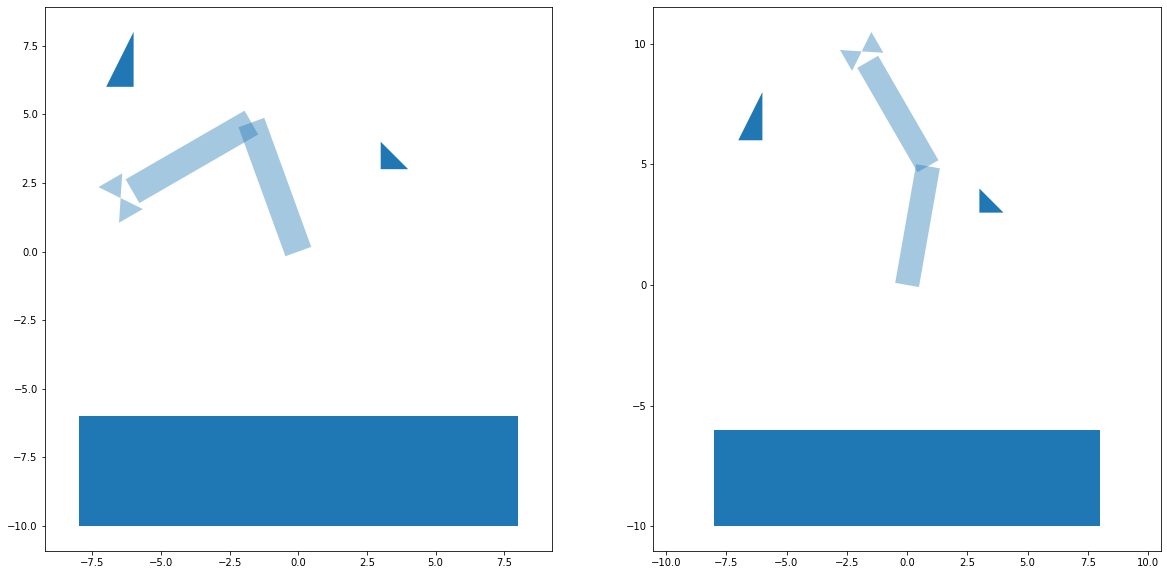

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
fv,obstacle = plotLinkRobot(np.array([route[0][0],route[0][1]]))
plt.subplot(1,2,2)
fv,obstacle = plotLinkRobot(np.array([route[-1][0],route[-1][1]]))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


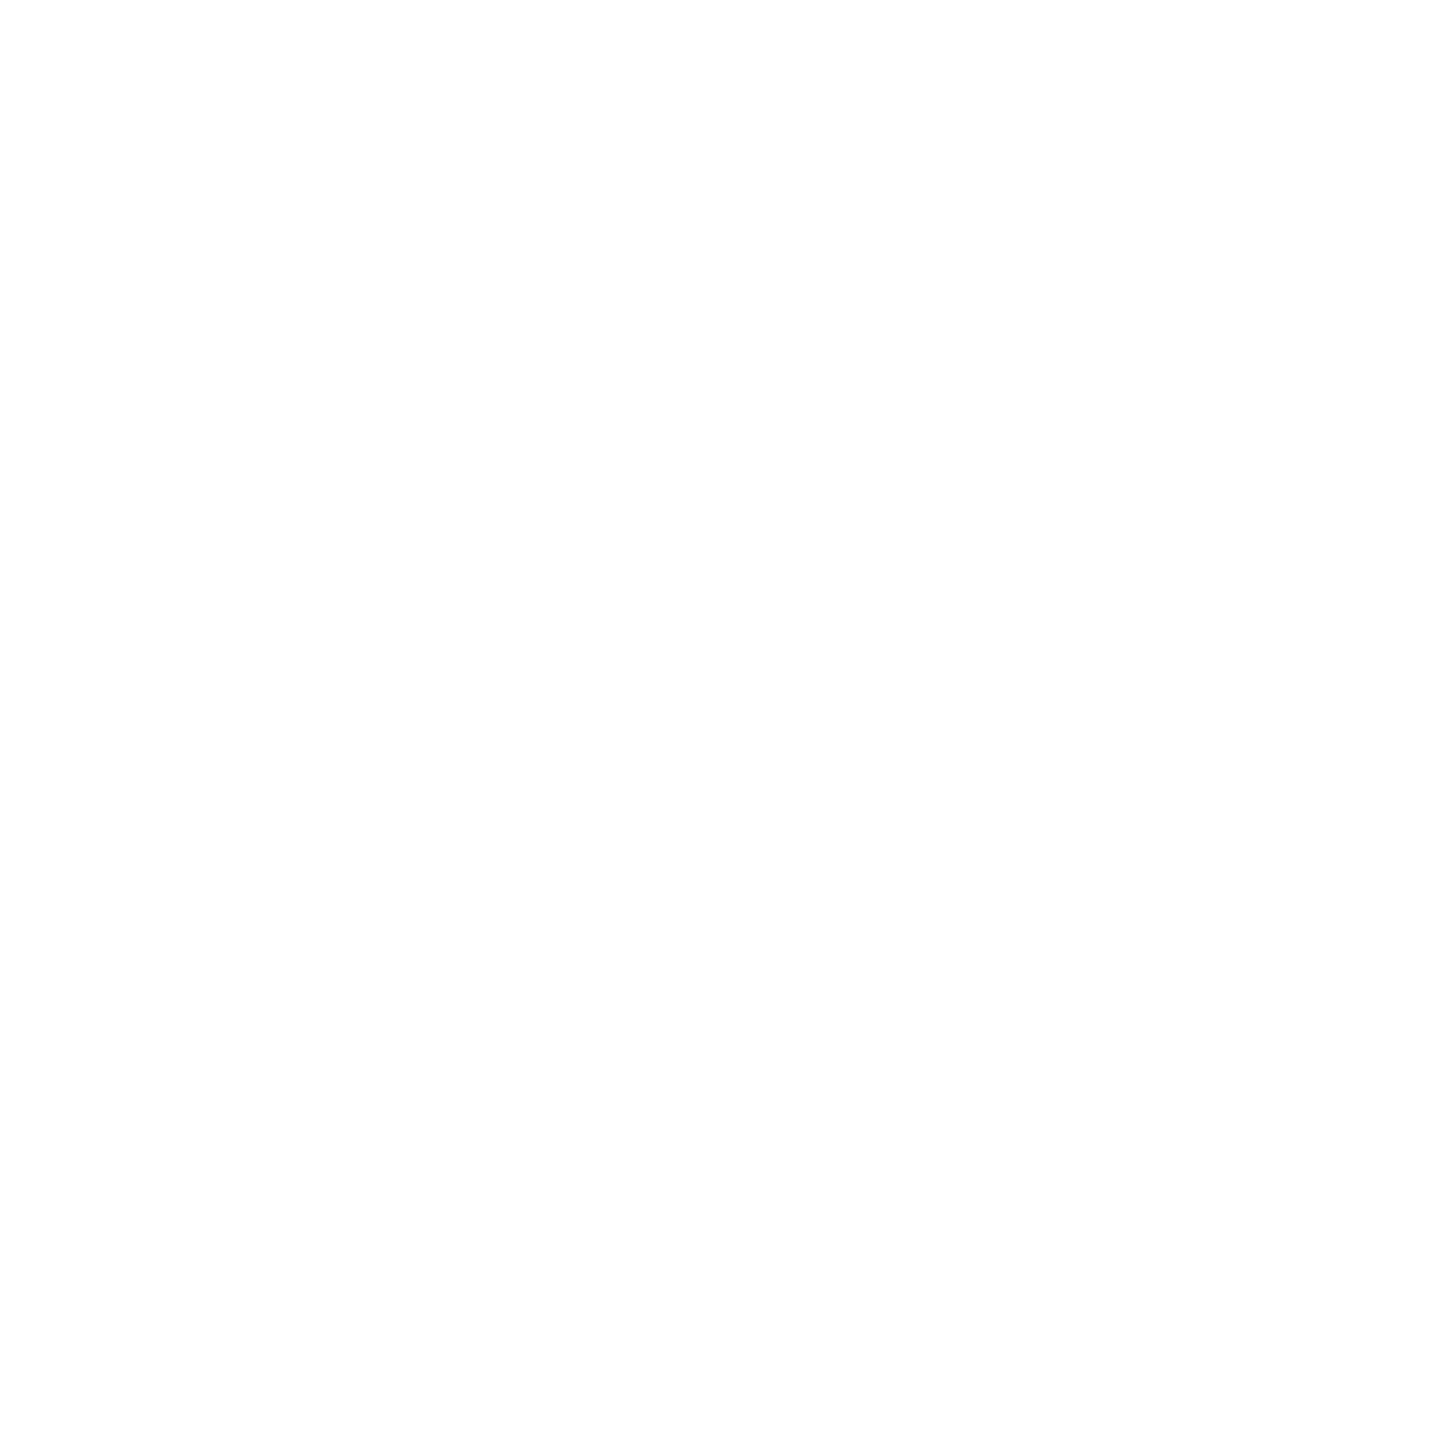

C:\Users\44754\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempting to set identical bottom == top == 12 results in singular transformations; automatically expanding.


<IPython.core.display.Javascript object>


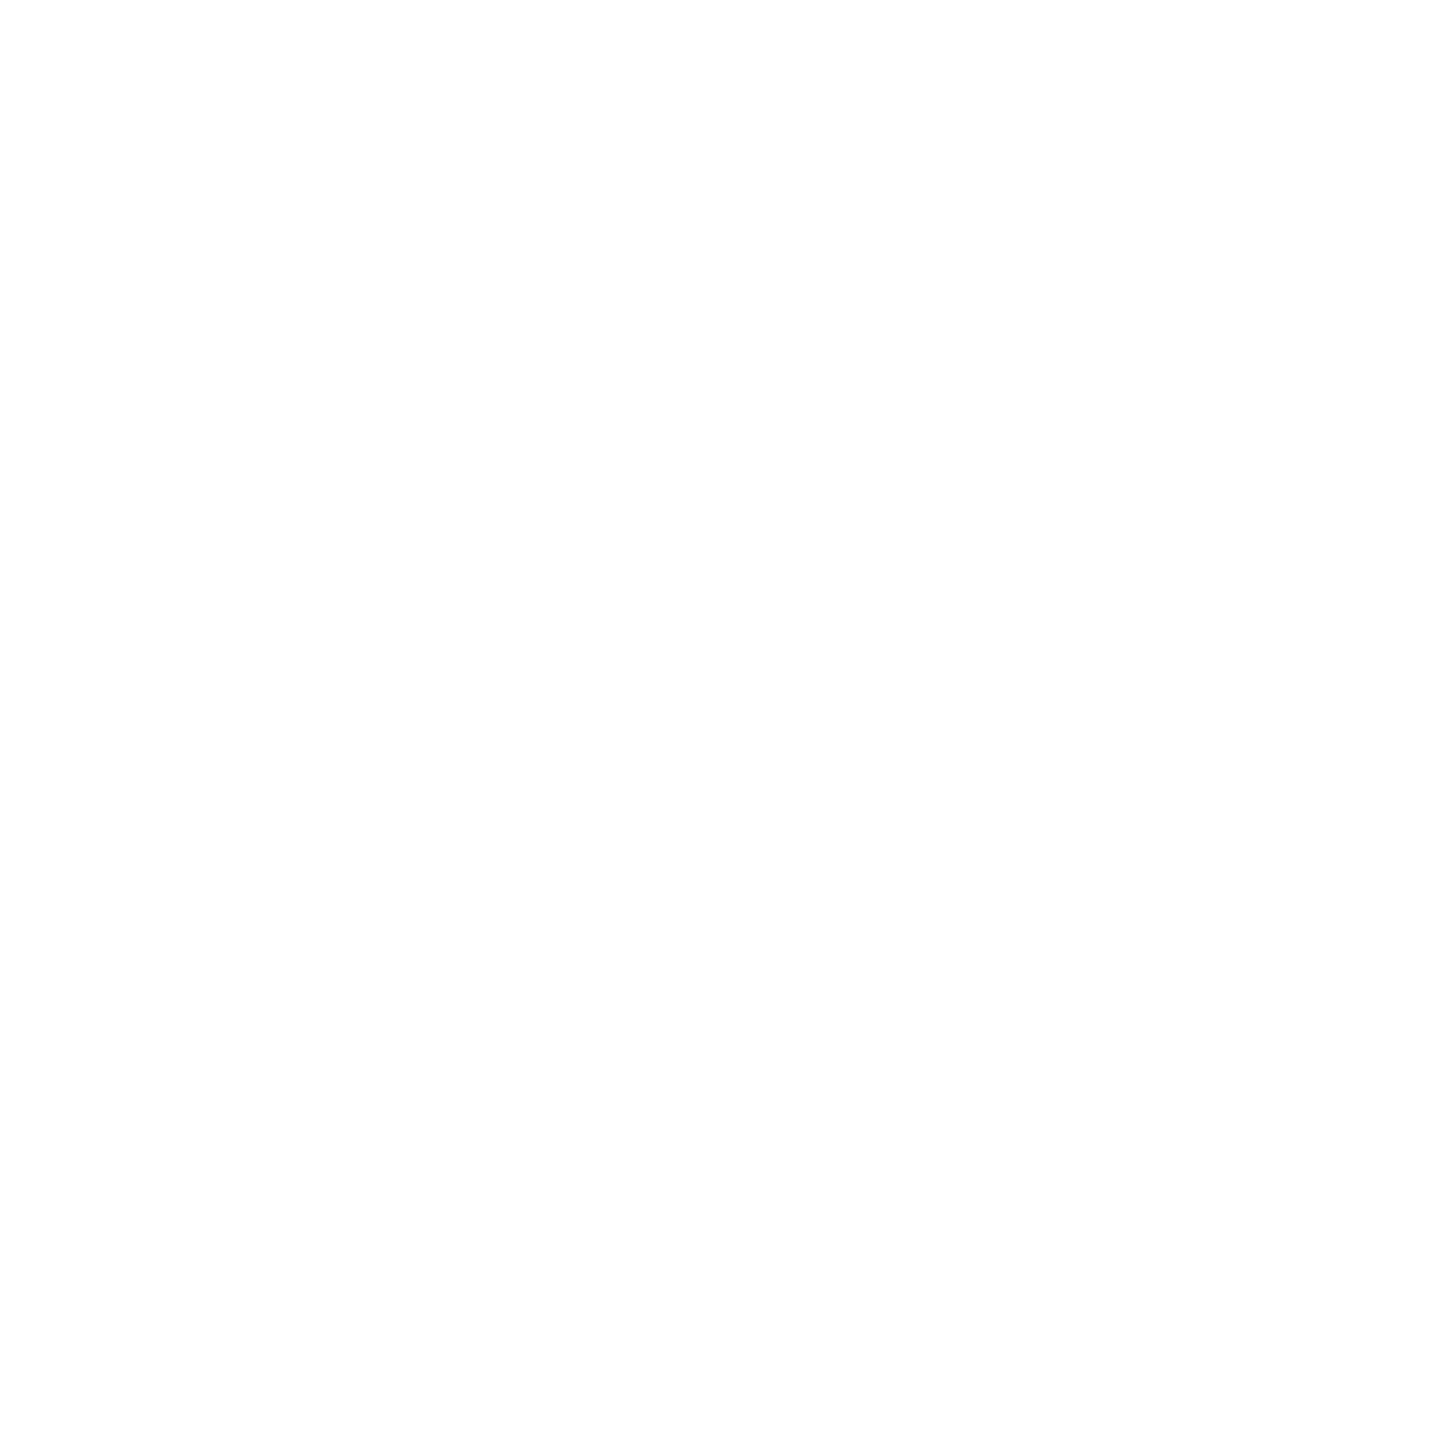

In [18]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
plt.ylim([-12,12]); plt.xlim([-12,12])
ax = plt.gca()
plt.ion()
fig.show()
fig.canvas.draw()

for i in range(len(route)):
    ax.clear()
    fv,obstacle = plotLinkRobot(np.array([route[i][0],route[i][1]]))
    fig.canvas.draw()